## Install Libaries

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 20.0 MB/s eta 0:00:00


## Import Libraries

In [2]:
from ultralytics import YOLO
from IPython.display import display, Image

import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# for setting locale
import locale
locale.getpreferredencoding = lambda: "UTF-8"

## Dataset Preparation

Dataset Link: https://data.mendeley.com/datasets/8h3s6jkyff/1

In [4]:
# create the `datasets/` directory
!mkdir datasets

In [5]:
# download the dataset from roboflow
!curl -L "https://universe.roboflow.com/ds/UfvZiKcX3m?key=fWDBwZKQSV" > dataset.zip

# extract the dataset zip to the `datasets/` directory
!unzip -q dataset.zip -d datasets/

# delete the dataset zip
!rm dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   2281      0 --:--:-- --:--:-- --:--:--  2282
100  122M  100  122M    0     0  36.0M      0  0:00:03  0:00:03 --:--:-- 49.3M


In [6]:
# initialize some variables for important directories
home = "/content/"
dataset_loc = home + "datasets/"
descriptor_location = dataset_loc + "data.yaml"

## Model Download and Setup

In [7]:
# download YOLOv9c model from pretrained weight
model = YOLO("yolo11x.pt")

# display model information
model.info()

100%|██████████| 109M/109M [00:01<00:00, 113MB/s]


YOLO11x summary: 631 layers, 56,966,176 parameters, 0 gradients, 196.0 GFLOPs


(631, 56966176, 0, 195.9587328)

## Training with Custom Dataset

In [8]:
# train using gpu
model.to("cuda")

# train the model on the Tomato dataset for 10 epochs
train_results = model.train(data=descriptor_location, epochs=10, imgsz=416, plots=True, device=0)

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/content/datasets/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 26.4MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 119MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 3628 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3628/3628 [00:01<00:00, 1881.61it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid/labels... 1007 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1007/1007 [00:00<00:00, 1211.05it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.28G      1.535      2.447      1.711         28        416: 100%|██████████| 227/227 [02:17<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:15<00:00,  2.00it/s]

                   all       1007       1909       0.61      0.147     0.0697     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.13G      1.733      2.403      1.864         17        416: 100%|██████████| 227/227 [02:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.17it/s]

                   all       1007       1909      0.547      0.149      0.117     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.89G      1.765      2.381        1.9         15        416: 100%|██████████| 227/227 [02:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:15<00:00,  2.10it/s]


                   all       1007       1909       0.46       0.14     0.0999     0.0562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.12G      1.682       2.21      1.834         19        416: 100%|██████████| 227/227 [02:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]

                   all       1007       1909      0.558      0.184      0.185      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.88G      1.575      1.966      1.751         25        416: 100%|██████████| 227/227 [02:11<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]

                   all       1007       1909      0.717      0.182      0.223      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.11G      1.489      1.749      1.693         22        416: 100%|██████████| 227/227 [02:11<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]

                   all       1007       1909      0.658      0.264      0.268      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.12G      1.413      1.598      1.642         17        416: 100%|██████████| 227/227 [02:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]

                   all       1007       1909      0.584      0.264      0.279      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      8.12G      1.349      1.455      1.588         35        416: 100%|██████████| 227/227 [02:11<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.16it/s]

                   all       1007       1909      0.493      0.301      0.321      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.89G      1.289      1.328       1.54         31        416: 100%|██████████| 227/227 [02:11<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]

                   all       1007       1909       0.66      0.331      0.385      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.12G      1.228      1.182      1.499         24        416: 100%|██████████| 227/227 [02:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]

                   all       1007       1909      0.598      0.344      0.417      0.265



10 epochs completed in 0.438 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 114.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11x summary (fused): 464 layers, 56,844,349 parameters, 0 gradients, 194.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.97it/s]


                   all       1007       1909      0.601      0.343      0.417      0.264
                  Mask         79         92      0.196    0.00425      0.155     0.0897
                   can         18         20      0.434       0.05     0.0925     0.0515
             cellphone         61         71      0.789      0.945      0.963      0.802
           electronics         27         40      0.405        0.5      0.432       0.24
               gbottle         36         82      0.351      0.622      0.527       0.31
                 glove         38         57       0.63      0.179       0.55       0.41
                 metal         10         22          1          0     0.0154    0.00974
                  misc         48         51      0.746      0.137      0.238      0.158
                   net        147        149      0.567      0.816      0.744       0.43
                  pbag        291        331      0.662      0.921      0.845      0.703
               pbottl

### Training Results

In [9]:
train_results.results_dict

{'metrics/precision(B)': 0.6011954906956591,
 'metrics/recall(B)': 0.3432147003669259,
 'metrics/mAP50(B)': 0.4167208872332303,
 'metrics/mAP50-95(B)': 0.2643100859953082,
 'fitness': 0.2795511661191004}

In [10]:
!ls /content/runs/detect/train/

args.yaml					   PR_curve.png		  val_batch0_pred.jpg
confusion_matrix_normalized.png			   R_curve.png		  val_batch1_labels.jpg
confusion_matrix.png				   results.csv		  val_batch1_pred.jpg
events.out.tfevents.1736292622.3ff4590125dd.383.0  results.png		  val_batch2_labels.jpg
F1_curve.png					   train_batch0.jpg	  val_batch2_pred.jpg
labels_correlogram.jpg				   train_batch1.jpg	  weights
labels.jpg					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg


/content


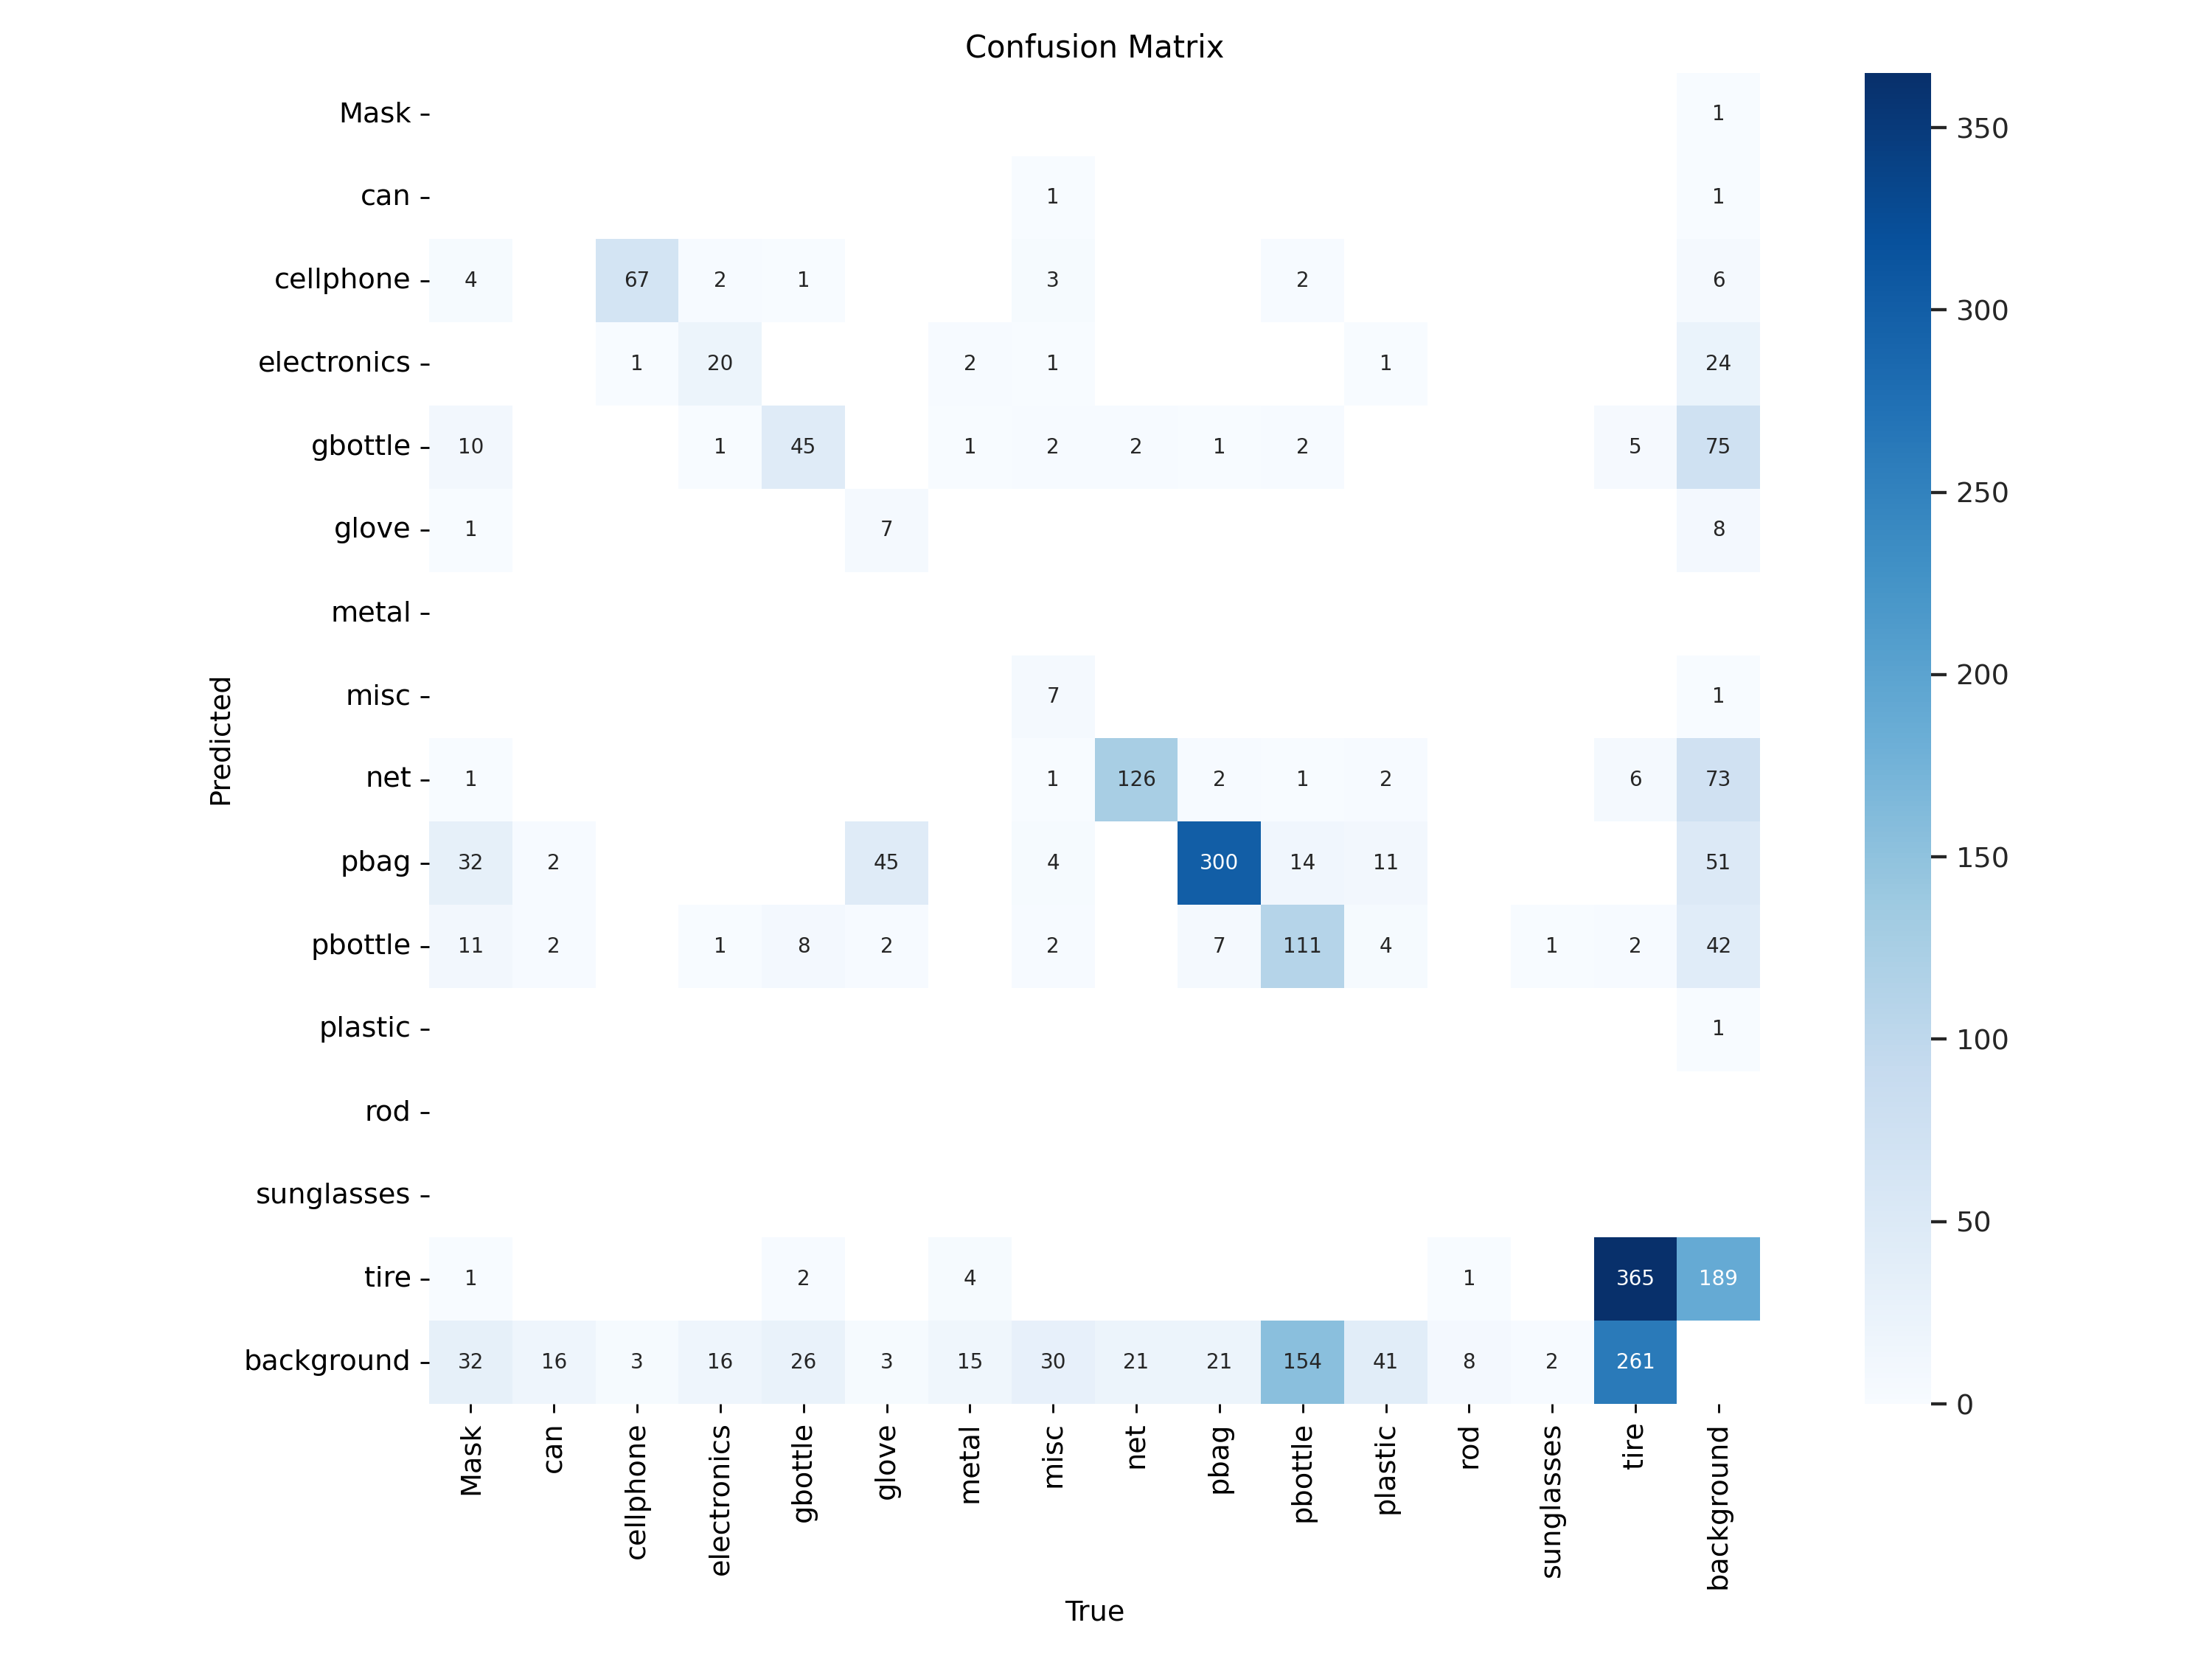

In [11]:
%cd {home}
Image(filename=f'{home}runs/detect/train/confusion_matrix.png', width=600)

/content


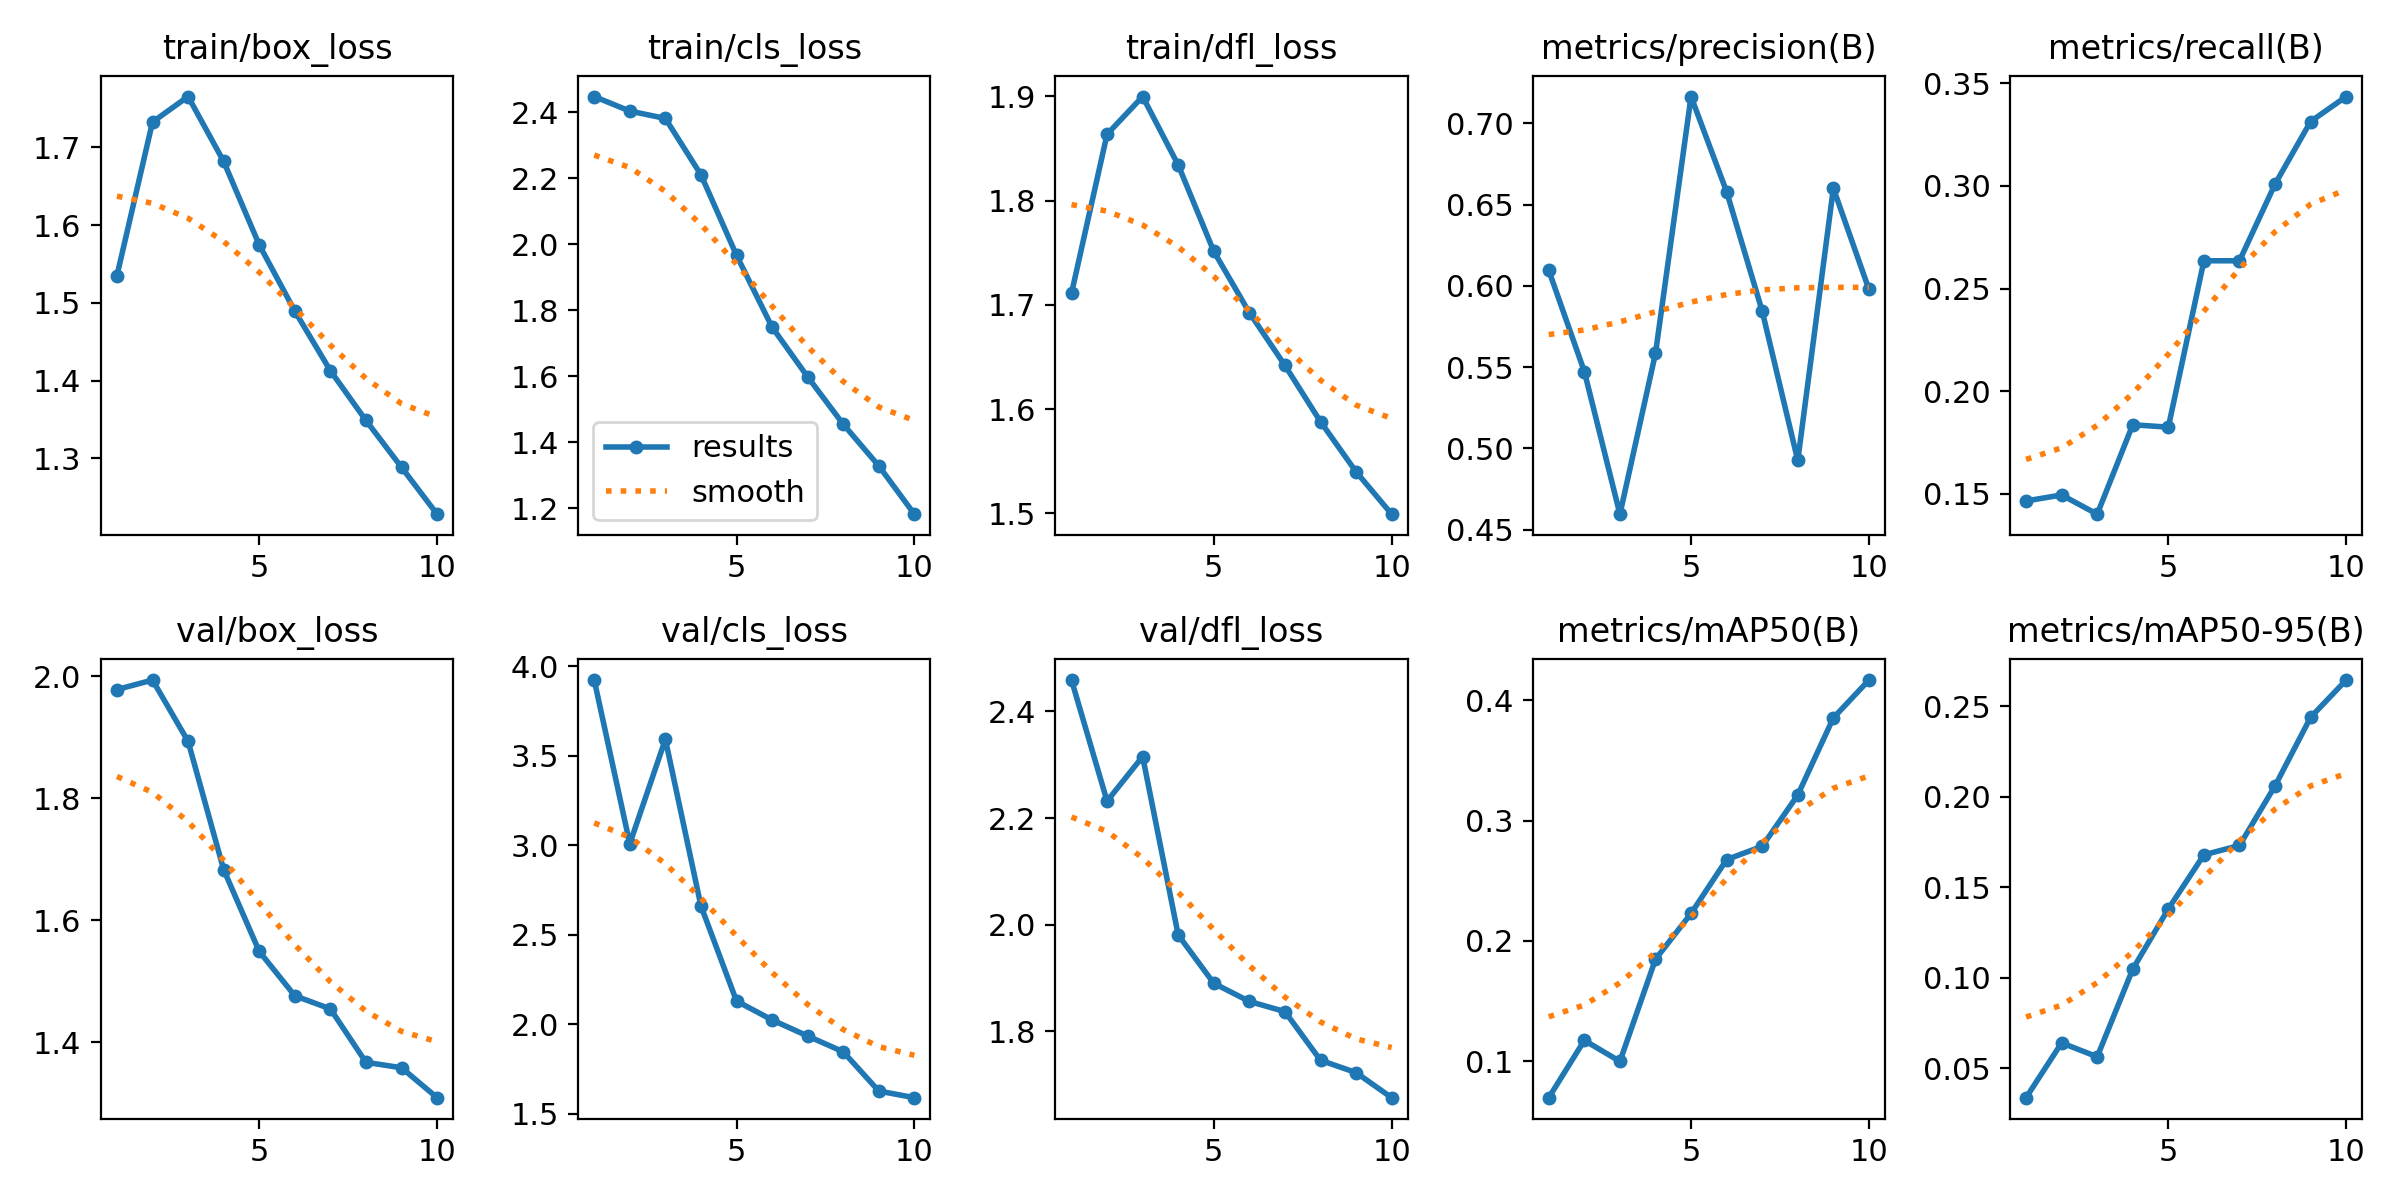

In [12]:
%cd {home}
Image(filename=f'{home}runs/detect/train/results.png', width=600)

/content


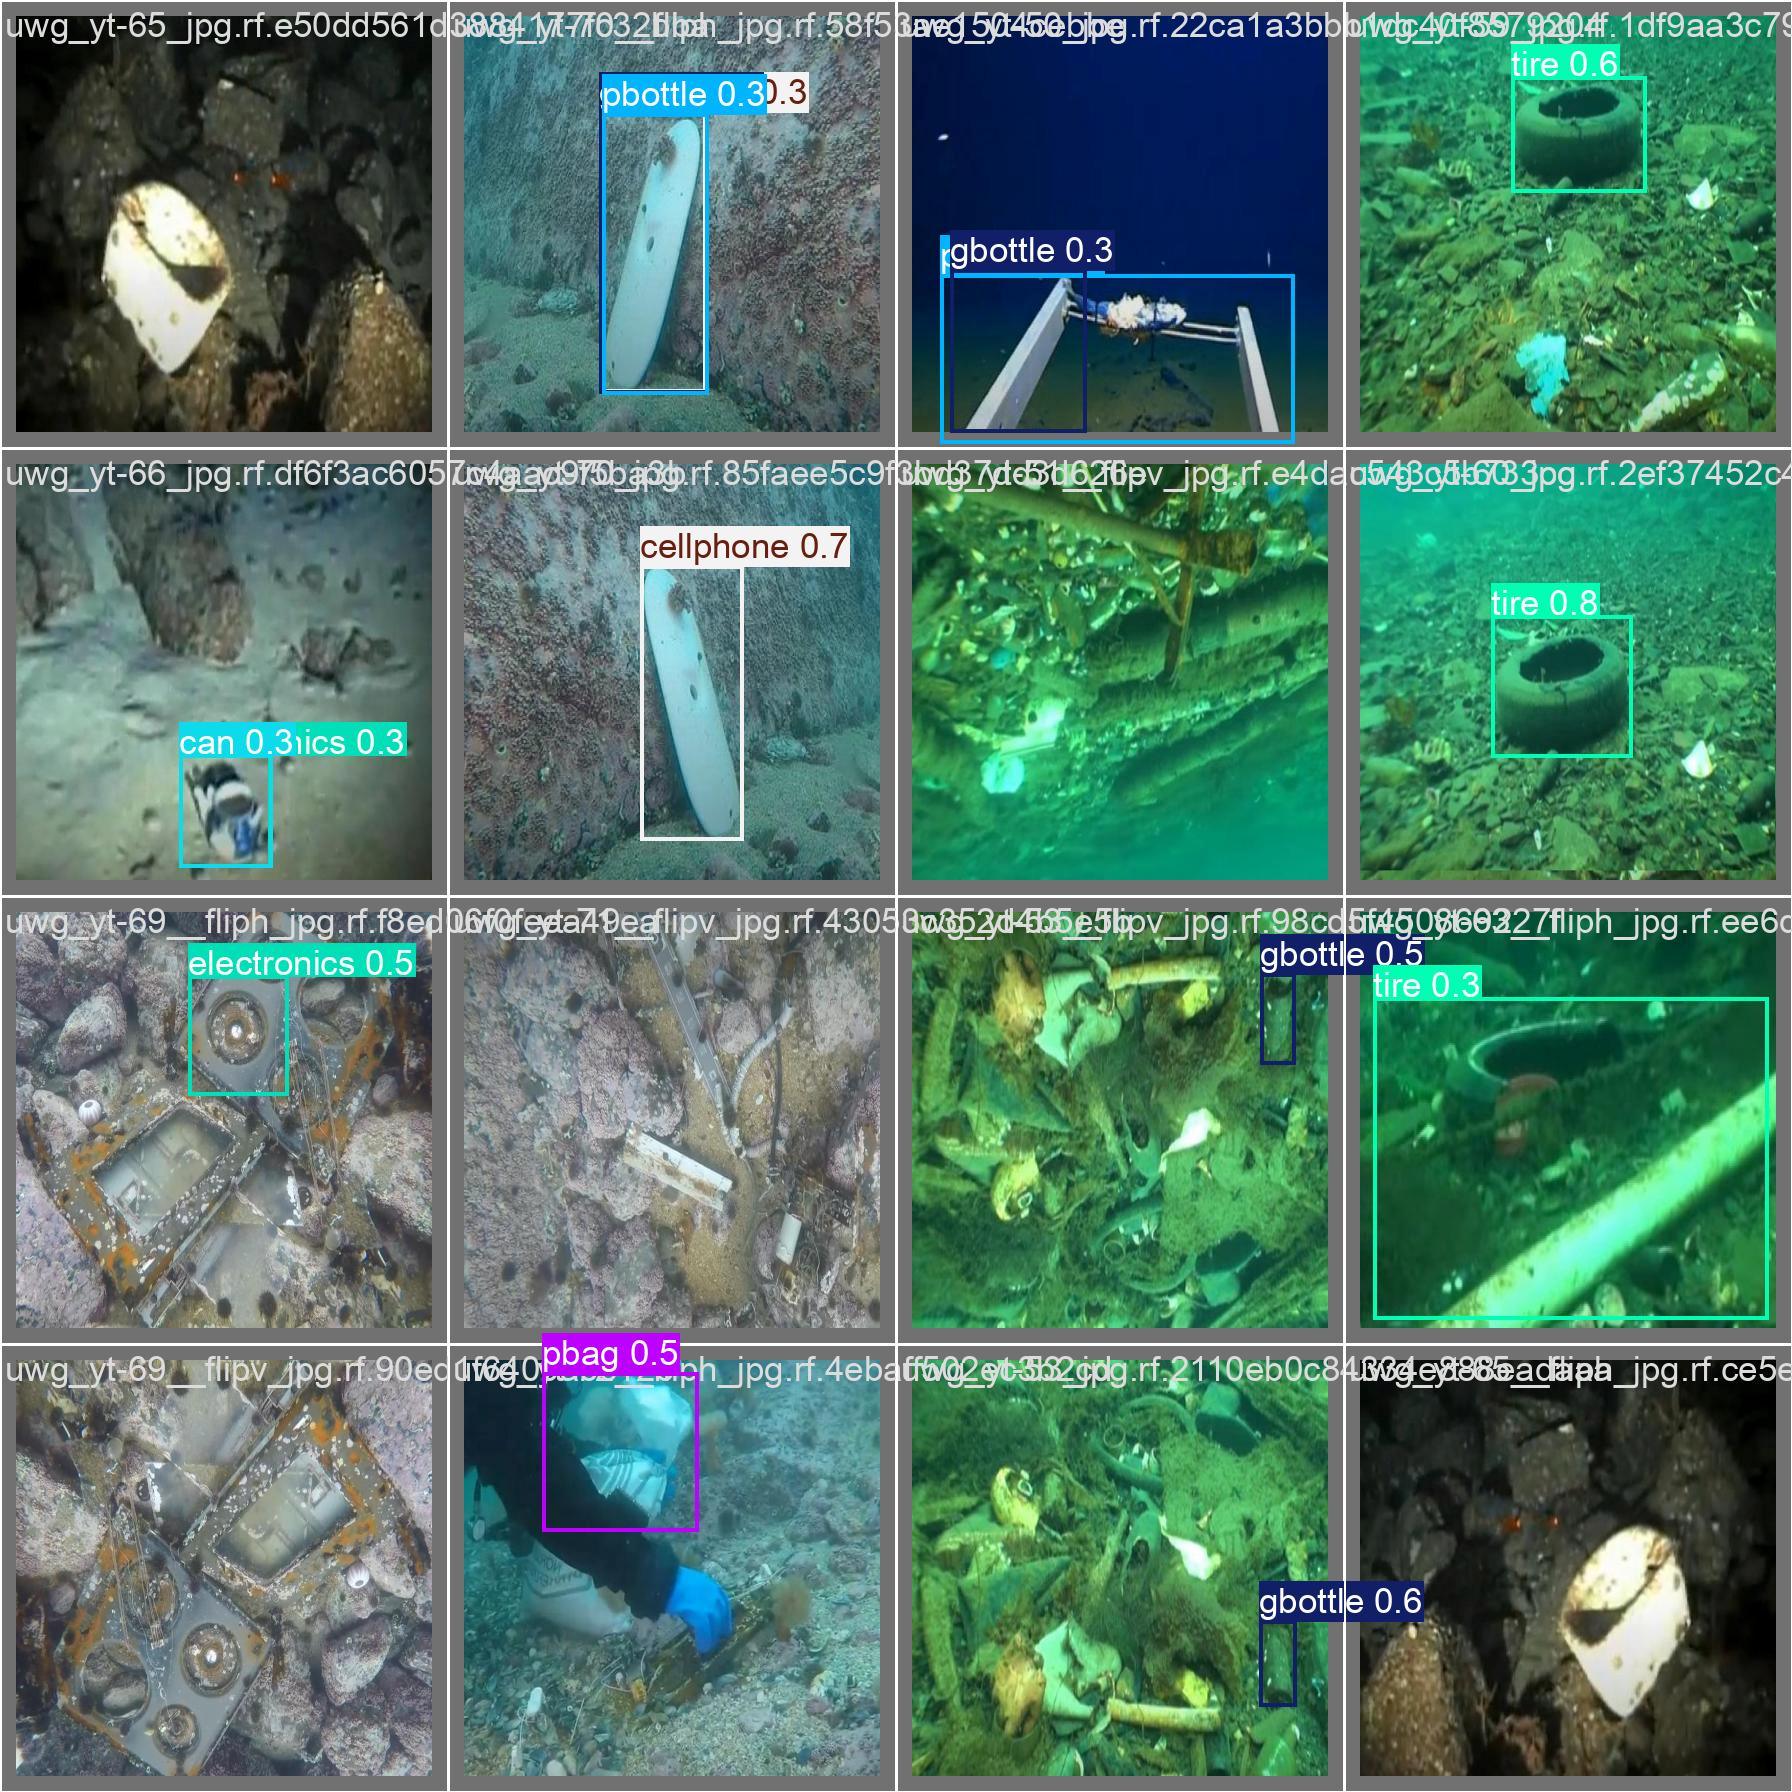

In [13]:
%cd {home}
Image(filename=f'{home}runs/detect/train/val_batch0_pred.jpg', width=600)

## Validation

In [14]:
validation_results = model.val()

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11x summary (fused): 464 layers, 56,844,349 parameters, 0 gradients, 194.5 GFLOPs


val: Scanning /content/datasets/valid/labels.cache... 1007 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1007/1007 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:35<00:00,  1.78it/s]


                   all       1007       1909      0.598      0.344      0.417      0.265
                  Mask         79         92      0.201    0.00437      0.154     0.0888
                   can         18         20       0.43       0.05     0.0925      0.056
             cellphone         61         71      0.789      0.946      0.963      0.802
           electronics         27         40      0.404        0.5      0.433      0.243
               gbottle         36         82      0.349      0.622      0.526      0.308
                 glove         38         57       0.63       0.18       0.55      0.411
                 metal         10         22          1          0     0.0152    0.00963
                  misc         48         51      0.698      0.137      0.238      0.158
                   net        147        149      0.565      0.819      0.744       0.43
                  pbag        291        331      0.661      0.924      0.846      0.703
               pbottl

### Validation Results

In [15]:
validation_results.results_dict

{'metrics/precision(B)': 0.59752206383563,
 'metrics/recall(B)': 0.3437689316487336,
 'metrics/mAP50(B)': 0.4168721432899716,
 'metrics/mAP50-95(B)': 0.2646555637857109,
 'fitness': 0.279877221736137}

In [16]:
!ls /content/runs/detect/train2/

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


/content


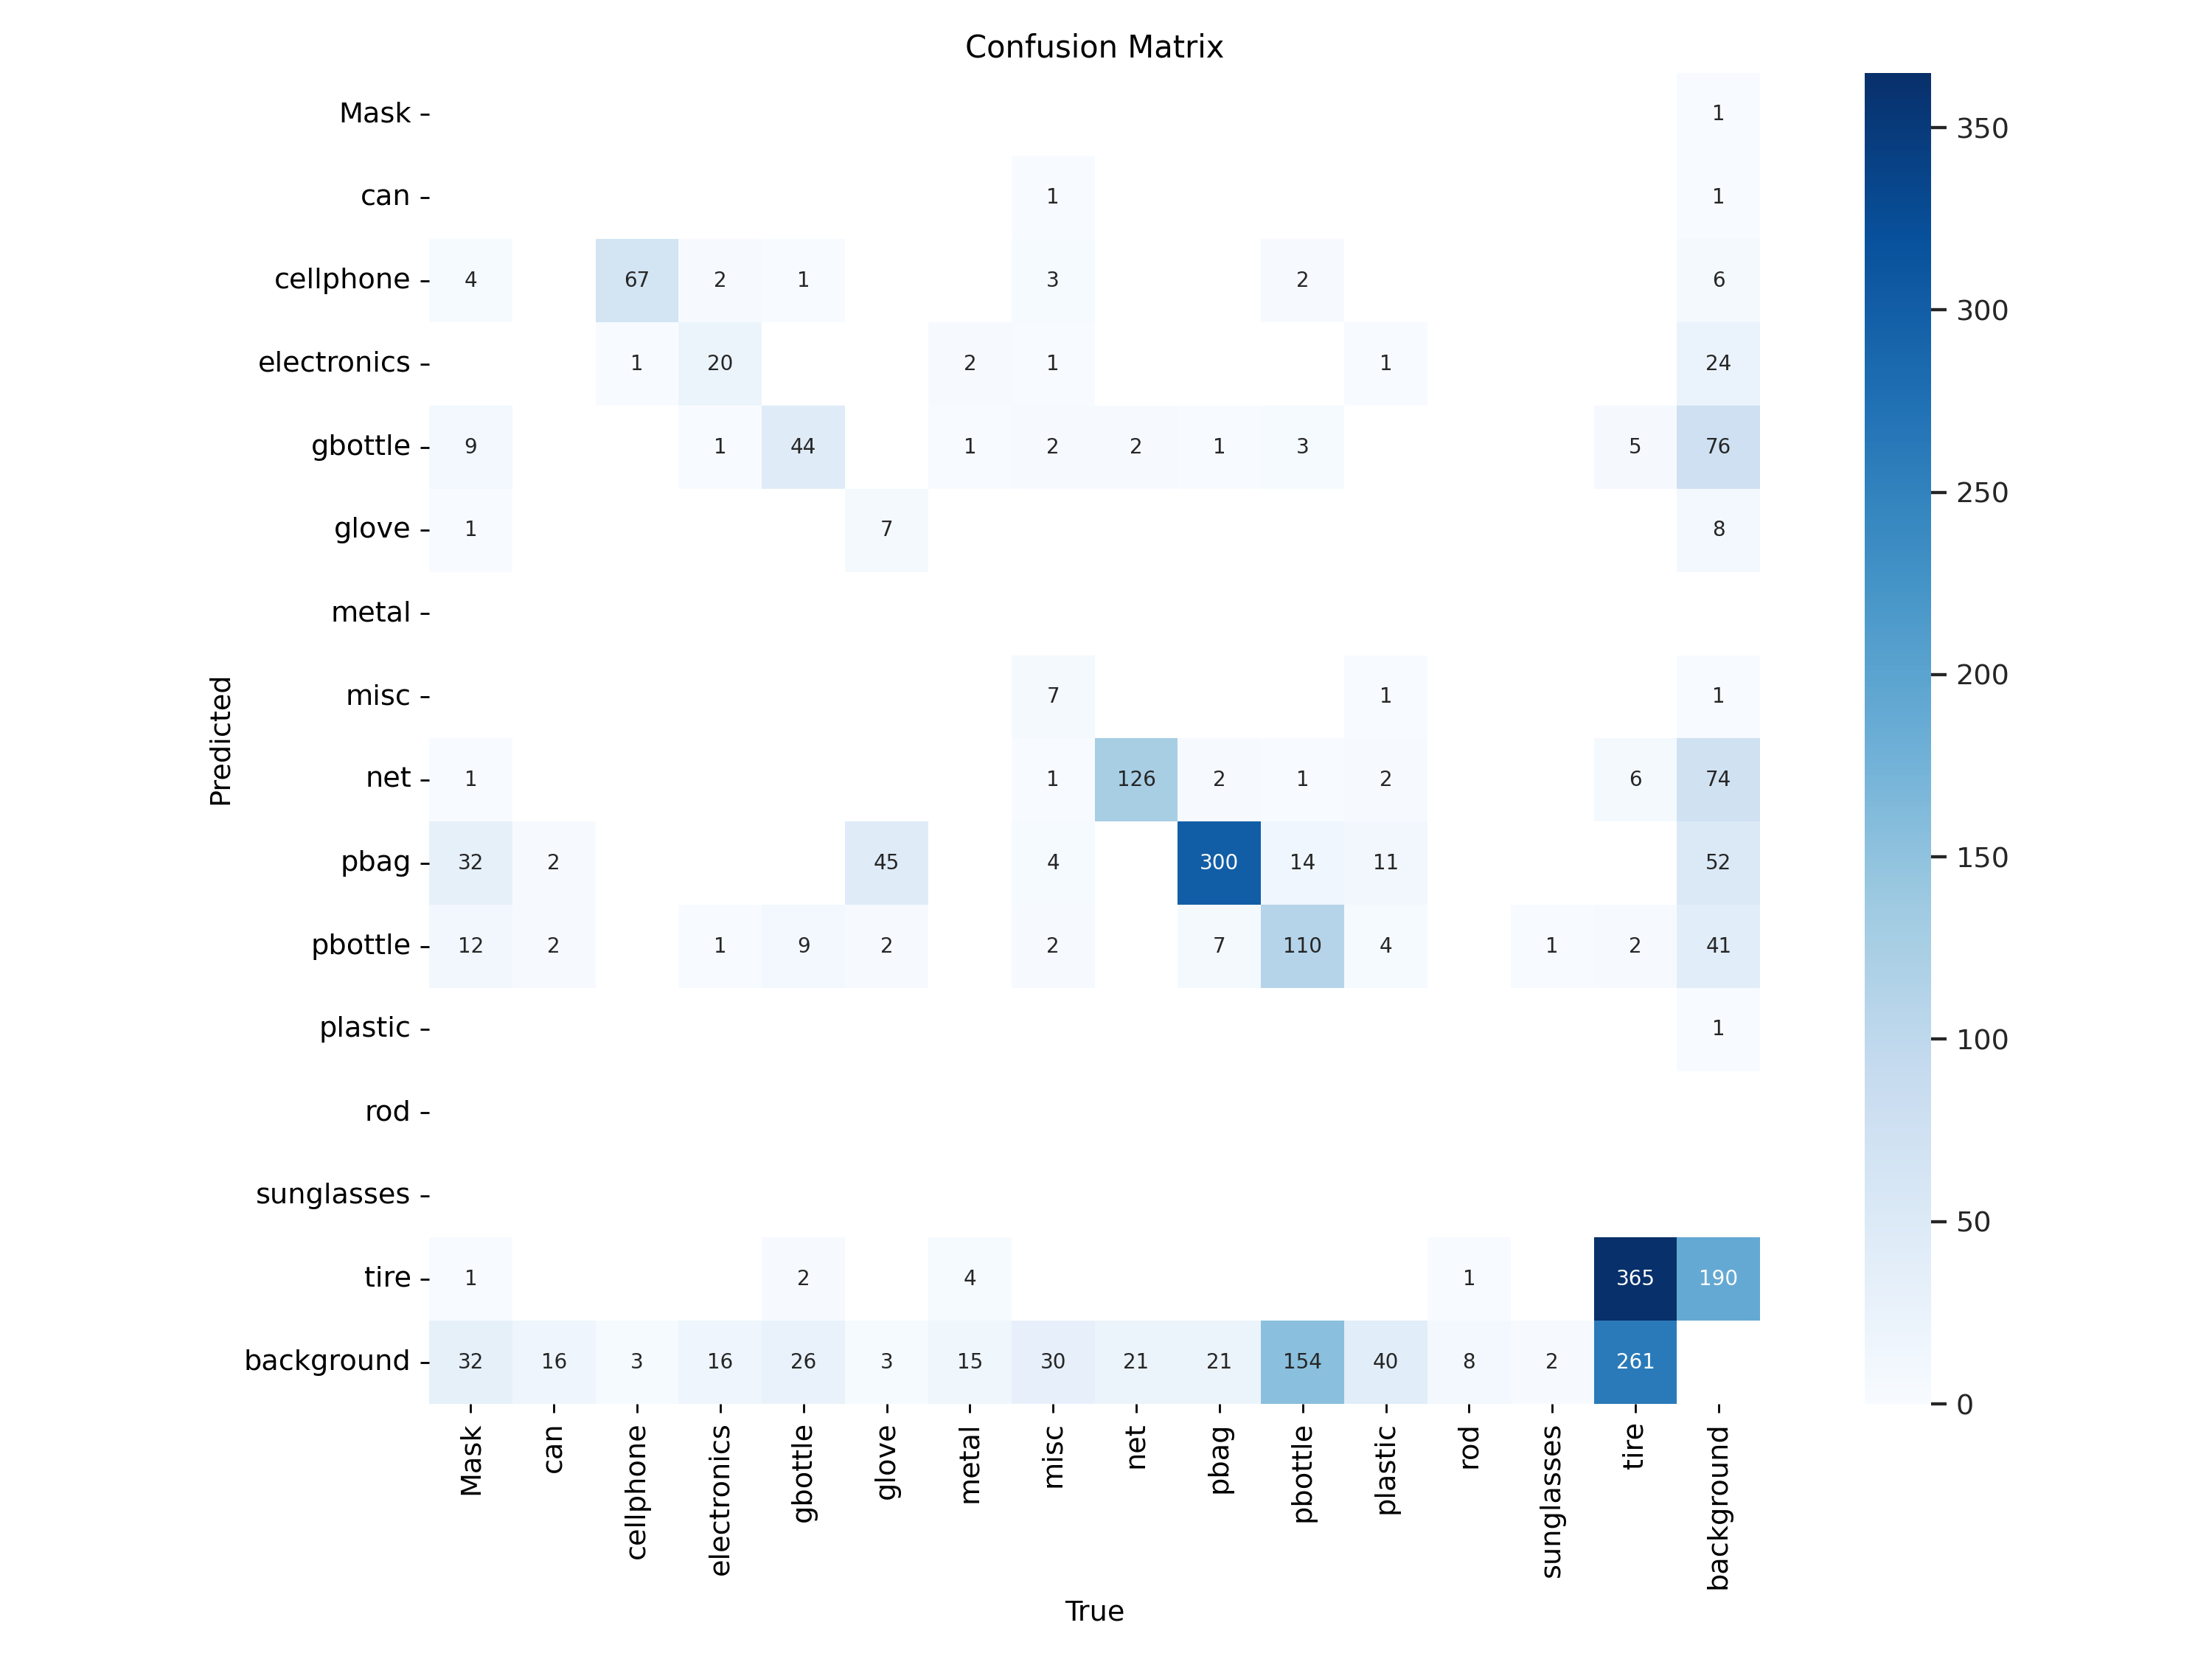

In [17]:
%cd {home}
Image(filename=f'{home}runs/detect/train2/confusion_matrix.png', width=600)

/content


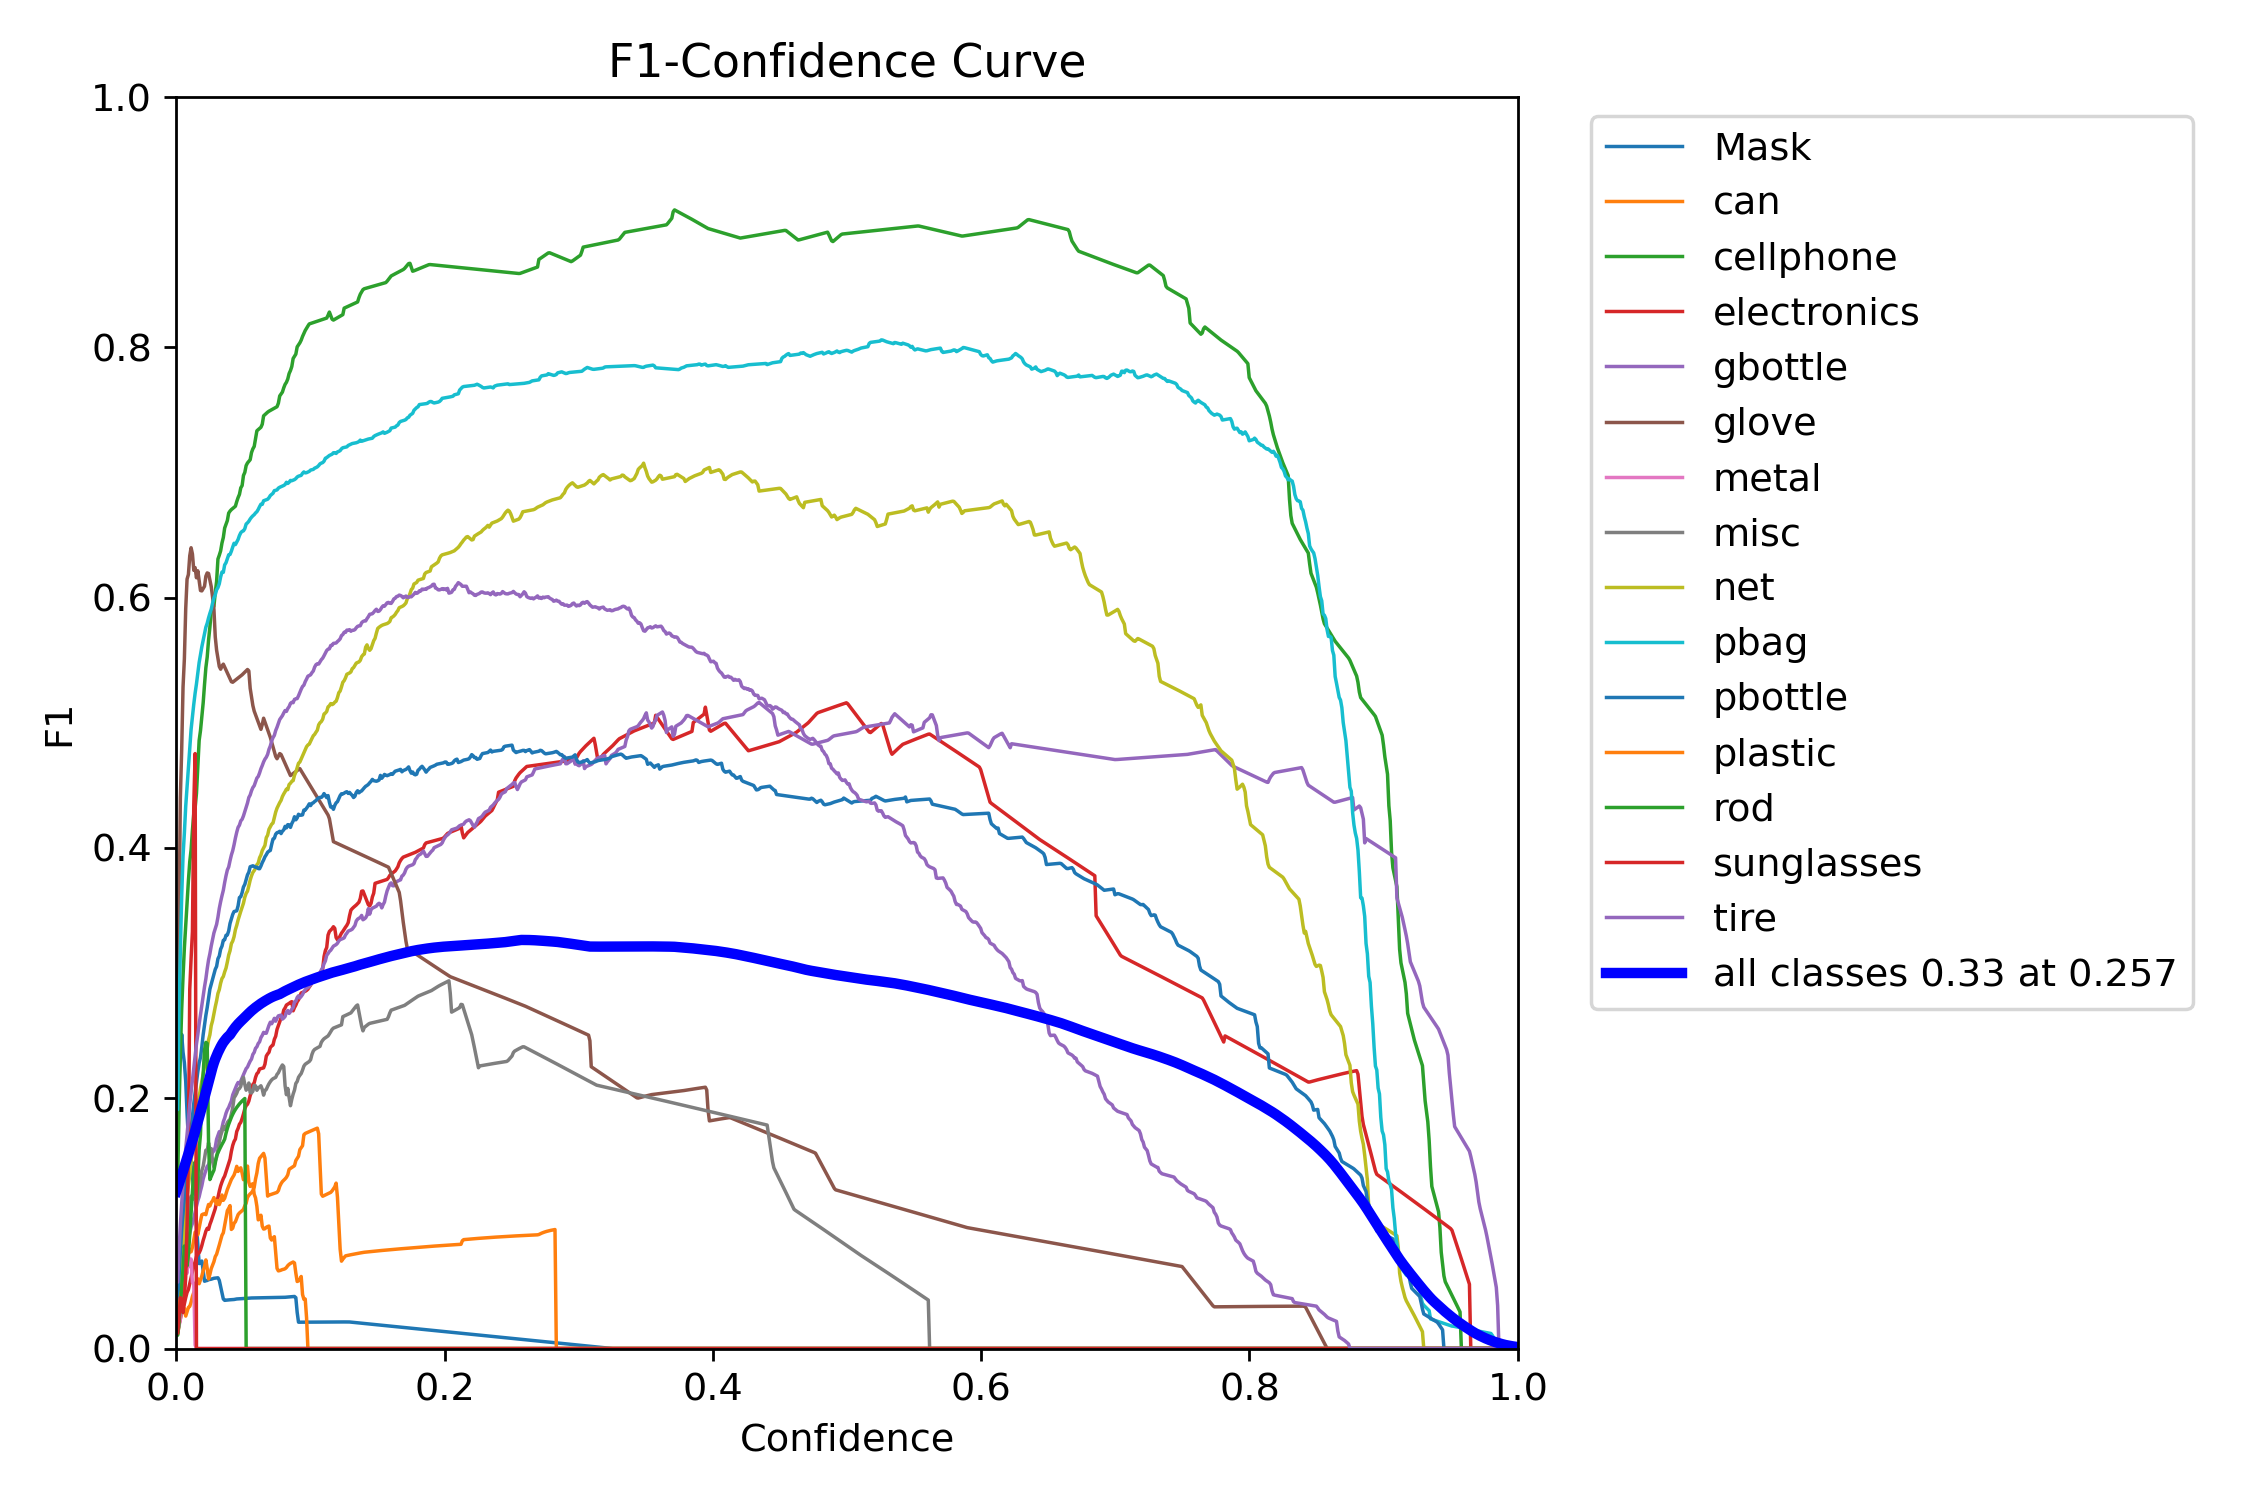

In [18]:
%cd {home}
Image(filename=f'{home}runs/detect/train2/F1_curve.png', width=600)

/content


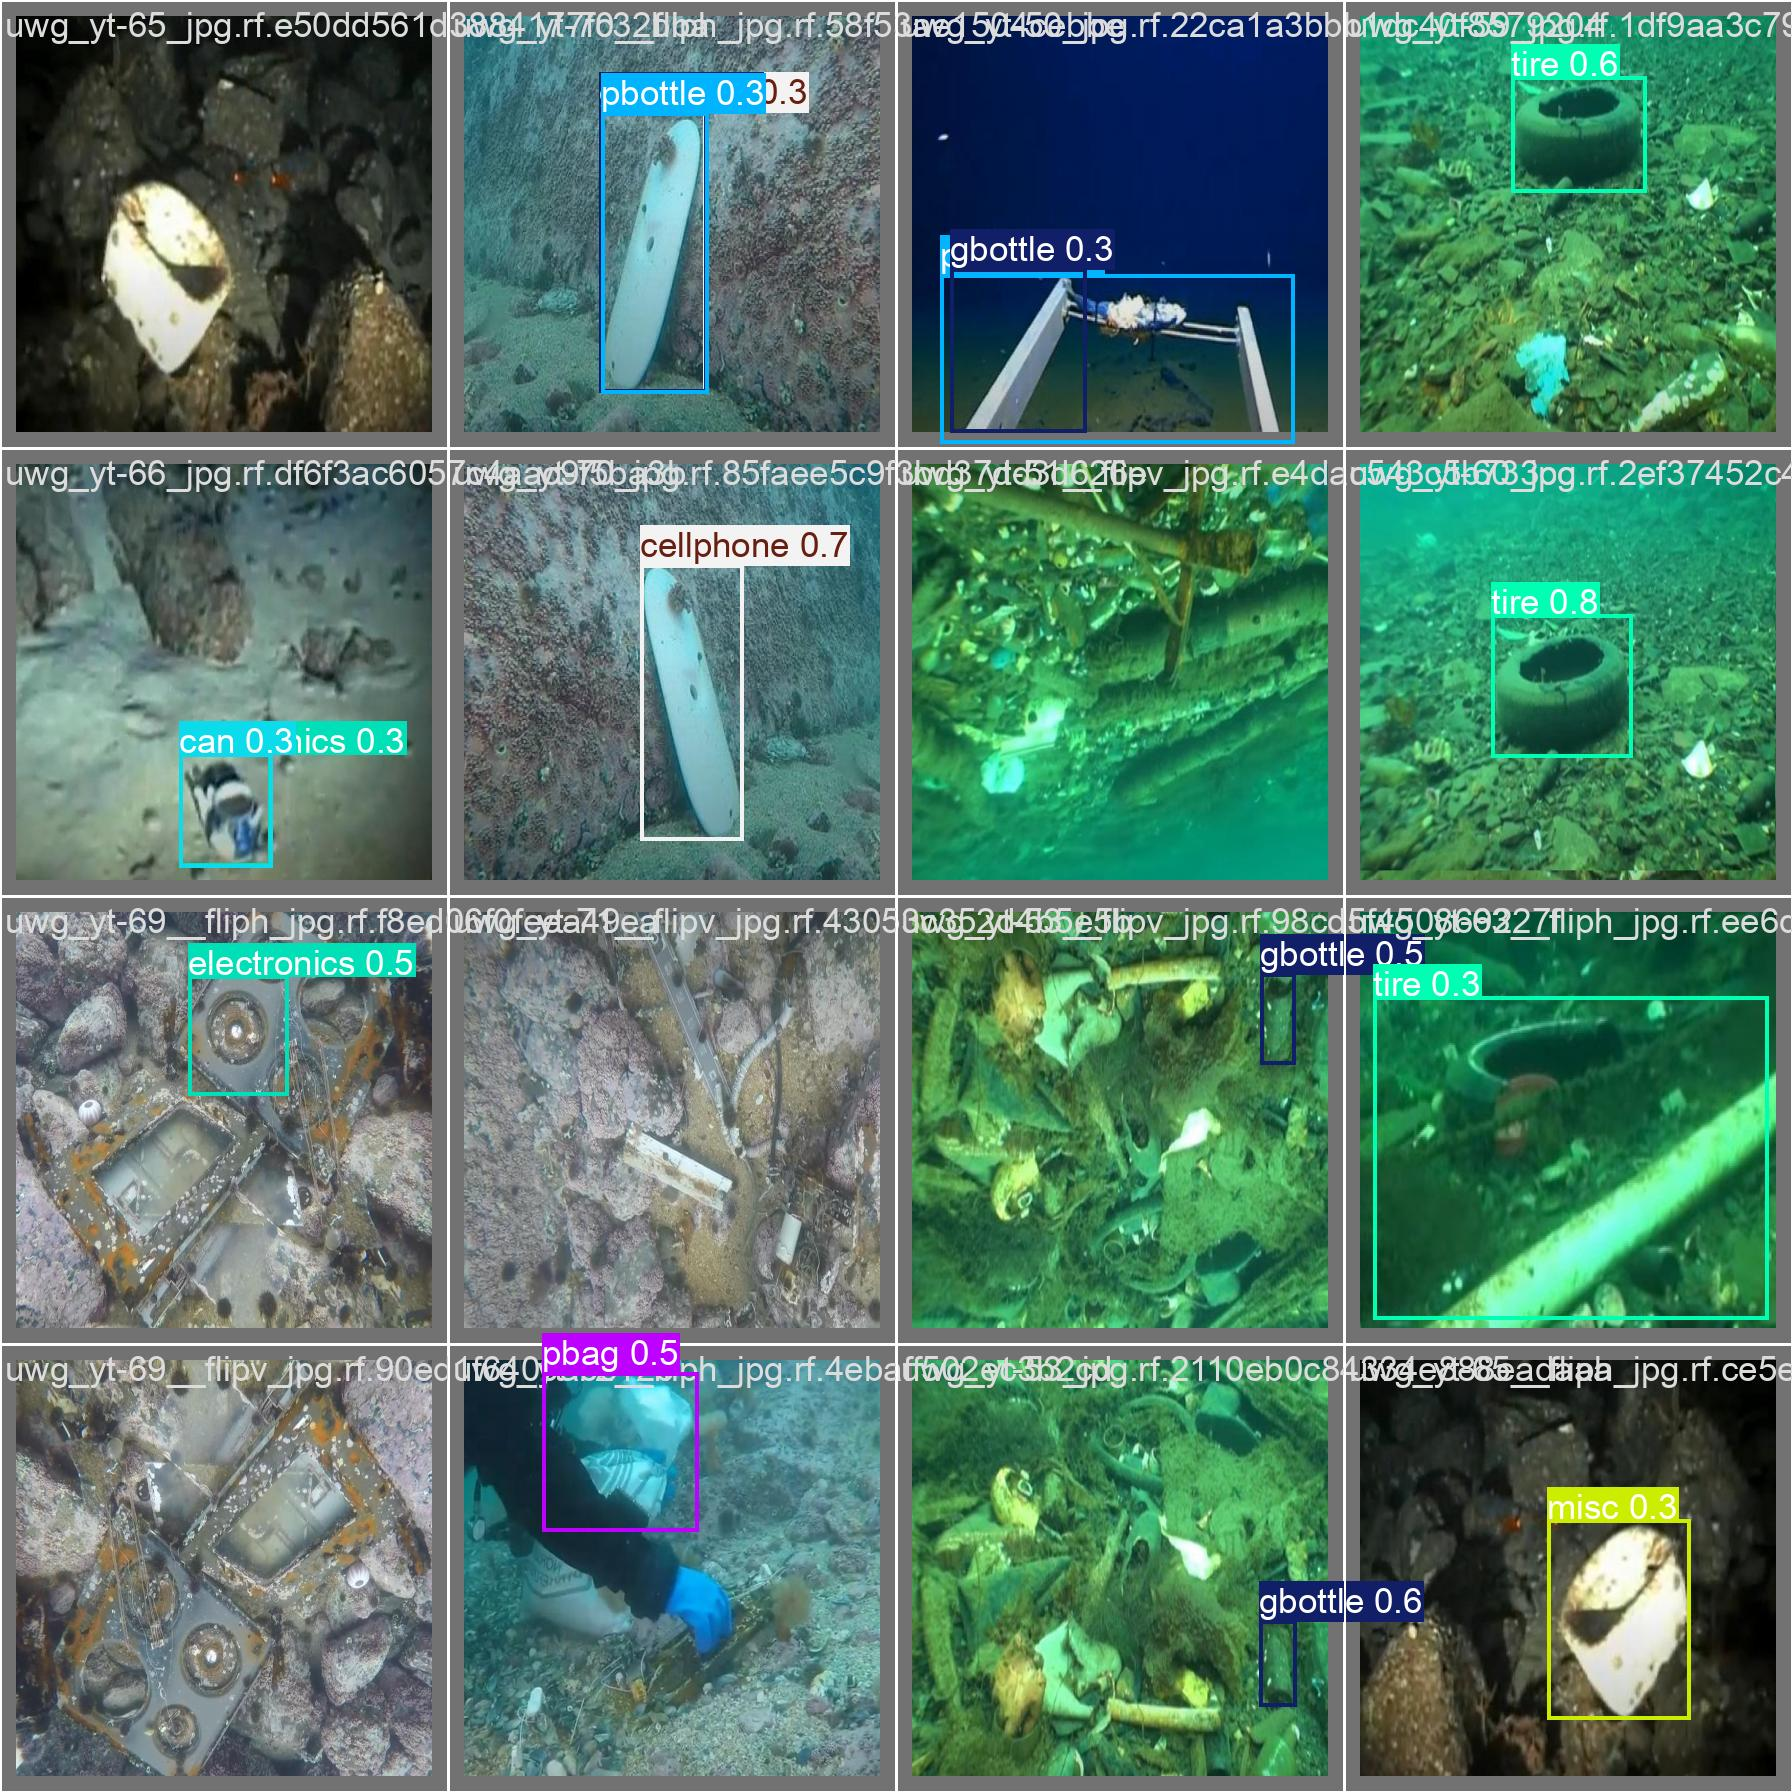

In [19]:
%cd {home}
Image(filename=f'{home}runs/detect/train2/val_batch0_pred.jpg', width=600)

## Inference/Prediction

In [20]:
prediction_results = model.predict(source=dataset_loc + "test/images", save=True)


image 1/501 /content/datasets/test/images/1bc7-iudfmpmn7245599_jpg.rf.c753c3518aa3bd30463da5e4b94a48be.jpg: 416x416 1 glove, 1 net, 51.7ms
image 2/501 /content/datasets/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.e06b1a6873ec4240c3493f281822c9d9.jpg: 416x416 (no detections), 51.8ms
image 3/501 /content/datasets/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.33eb90a2198eccbfbc6e7961b953ac4a.jpg: 416x416 1 gbottle, 49.8ms
image 4/501 /content/datasets/test/images/7_JPG_jpg.rf.3bf999e1c1e0a9a932b23d95b27357dc.jpg: 416x416 (no detections), 30.8ms
image 5/501 /content/datasets/test/images/GettyImages-1227891345-1000x667_jpg.rf.32ae9a5a4e410851af33ae743636ac1a.jpg: 416x416 1 pbag, 30.7ms
image 6/501 /content/datasets/test/images/GettyImageskl-1227891345-1000x667_jpg.rf.b1b21e076c5e516af46499d92e4d57d8.jpg: 416x416 (no detections), 30.2ms
image 7/501 /content/datasets/test/images/STOCK_DSC8177_3opix2_jpg.rf.e9f5811cd21ce1f2ac92b50c20df9b5d.jpg: 416x416 1

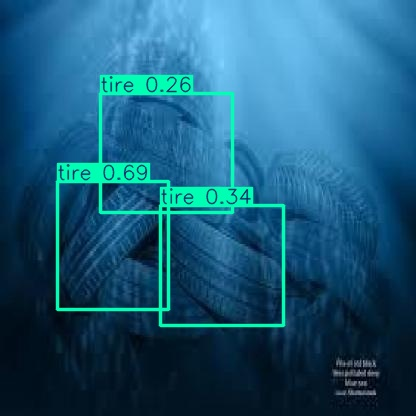

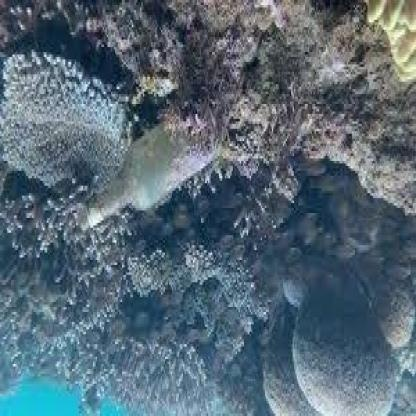

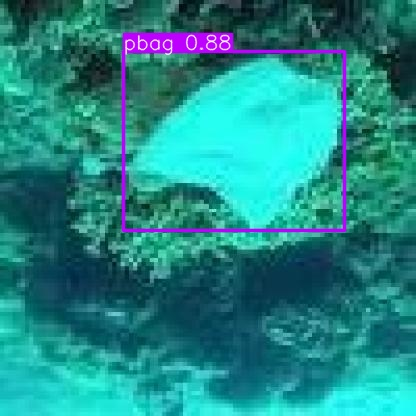

In [21]:
for image_path in glob.glob(f'{home}/runs/detect/train3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## XAI

In [22]:
# needed for yolo_cam
!pip install ttach

In [23]:
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
!git clone https://github.com/rigvedrs/YOLO-V11-CAM

Cloning into 'YOLO-V11-CAM'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 115 (delta 13), reused 8 (delta 8), pack-reused 94 (from 1)
Receiving objects: 100% (115/115), 41.00 MiB | 21.39 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [25]:
import os

print("Current Directory:", os.getcwd())

os.chdir('./YOLO-V11-CAM')

Current Directory: /content


In [26]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [47]:
!mkdir /content/models

model.save("/content/models/underwater_object_detection.pt")

In [48]:
# so that the model is in training mode
model = YOLO("/content/models/underwater_object_detection.pt")

In [49]:
# load a test image using opencv.
img = cv2.imread('/content/datasets/test/images/GettyImageskl-1227891345-1000x667_jpg.rf.b1b21e076c5e516af46499d92e4d57d8.jpg')
# resize the image to match the expected input size for the yolo model
img = cv2.resize(img, (416, 416))

rgb_img = img.copy()

# normalize the image by converting pixel values to the range [0, 1]
img = np.float32(img) / 255

In [50]:
def show_heatmap(target_layers):
    # initialize the eigancam object with the model and the target layers
    cam = EigenCAM(model, target_layers, task='od')
    # generate the grayscale cam using the specified target layers
    grayscale_cam = cam(rgb_img)[0, :, :]
    # overlay the grayscale cam on the original image
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    plt.imshow(cam_image)
    plt.show()


0: 416x416 (no detections), 52.0ms
Speed: 1.3ms preprocess, 52.0ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)


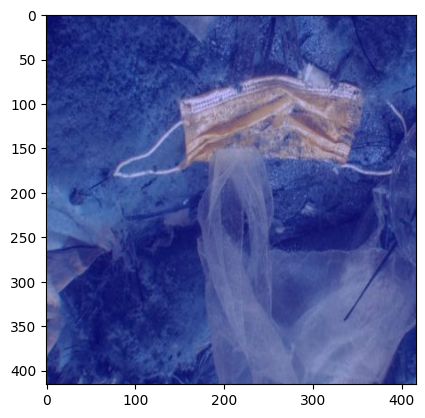

In [51]:
# generate and display the heatmap for a single target layer (second-to-last layer of the model)
show_heatmap(target_layers=[model.model.model[-2]])


0: 416x416 (no detections), 53.4ms
Speed: 1.6ms preprocess, 53.4ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)


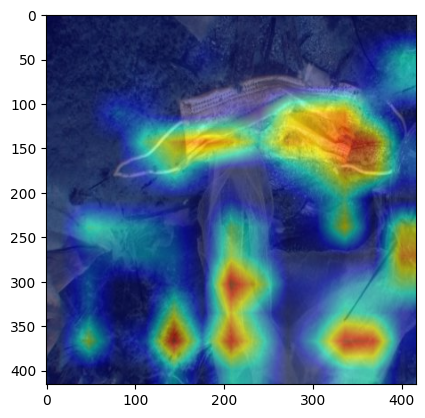

In [55]:
# generate and display the heatmap for multiple target layers (last three layers of the model)
show_heatmap(target_layers=[model.model.model[-2], model.model.model[-3], model.model.model[-4]])